## Université de Bordeaux,  Master Mention Informatique

## Intelligence Artificielle

### Deep Learning, feuille 1

### Présentation

Le but de ce premier TD est de vous familiariser avec les réseaux de neurones et leur entraînement. Nous allons passer en revue les éléments de base suivant :

 - données d'apprentissage, 
 
 - fonction de perte (loss function)
 
 - descente de gradient
 
 Pour cela, nous allons utiliser un réseau de neurone (composé d'un seul neurone en fait) pour deux tâches : 
 
  - une régression linéaire simple
  
  - une classification binaire.

Commençons par importer quelques unes des bibliothèques usuelles :

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### On génère les données 

Afin de réaliser une régression linéaire simple, nous allongs générer un nuage de points. Exécutez le code de la cellule suivante :

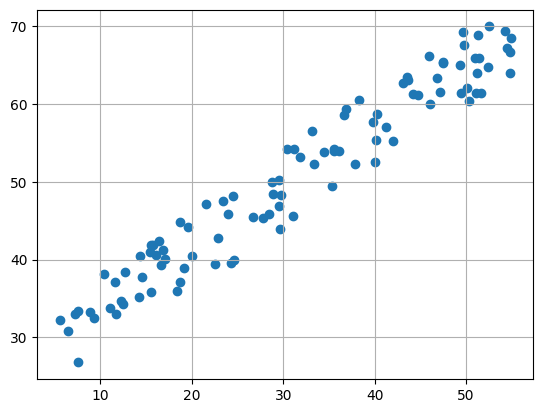

In [2]:
#Data: 
def generate(m, sizeNoise, slope, intersect):    
    x = [rd.random()*50 + 5 for i in range(m)]
    noise = [rd.random() * sizeNoise for i in range(m)]#np.rand(m,1) * sizeNoise
    y = [intersect + slope*x[i] + noise[i] for i in range(m)] 
    return np.array([x]), np.array([y])

m = 100
sizeNoise = 10
a = 0.8
b =  20
    
X, Y = generate(m, sizeNoise, a, b)
plt.grid()
plt.scatter(X, Y)
plt.show()

### Exercice 1. Un neurone :

Comme vu en cours, un neurone formel est représenté comme suit : 

![Un neurone formel (Mc Culloch & Pitts (1943))](./img/formal_neuron_s.png)

1. Nommez chacun des élements du neurone.

2. Ecrivez une fonction <code>neuron(x, w, b, f)</code> permettant d'implémenter ce neurone.

In [3]:
def neuron(x, w, b, f):
    # x est un vecteur de données (N échantillons), w et b sont des scalaires
    # Opération vectorisée : Z = X * w + b
    z = x * w + b
    y = f(z)
    return y

3. Définissez deux fonctions <code>id</code> et <code>sigmoid</code> définies par :
$$
id(z) = z \text{ et } sigmoid(z) = \frac{1}{1+ e^{-z}}.
$$

In [4]:
def id(z):
    return z

def sigmoid(z):
    return 1 / (1 + (np.exp(-z)))

4. Testez vos fonctions. L'exécution de la cellule suivante devrait donner le résultat affiché.

In [5]:
x = np.array([1])
w = np.array([1])
b = [1]

y_hat = neuron(x, w, b, id)
print('x: ', x)
print('y_hat: ', y_hat)

x:  [1]
y_hat:  [2]


### Exercice 2. Régression linéaire : 

Dans cet exercice, nous allons entraîner un neurone pour réaliser une régression linéaire simple. 

1. Dessiner le neurone qui sera utilisé. Identifiez bien les paramètres à trouver.

2. Ecrivez le code de la fonction <code>loss(y, y_hat)</code> définie comme la moyenne des carrés des écarts : 

$$
loss\left(y, \hat{y}\right) = \frac 1 {2*n} \sum_{i=1}^n \left(\hat{y_i} - y_i)\right)^2. 
$$

In [6]:
# ŷi = w*xi + b
def loss(y : np.ndarray, y_hat : np.ndarray) -> float:
    error = y_hat - y
    loss = float(np.mean(error ** 2) / 2)
    return loss


3. Calculez le gradient de la fonction ${\cal L} = loss$ par rapport aux deux variables $w$ et $b$.

4. Ecrivez la focntion <code>gradient(x, y_hat, y)</code> retournant le gradient de la fonction $\cal L$.

In [7]:
def gradient(x : np.ndarray, y_hat : np.ndarray, y : np.ndarray):
    error = y_hat - y
    grad_w = np.mean(error * x)
    grad_b = np.mean(error)
    return grad_w, grad_b

5. Ecrivez une fonction <code>train(x, y, eta, epochs)</code> qui réalise une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

In [8]:
def gradient_descent(w, b, grad_w, grad_b, eta):
     w_new = w - eta * grad_w
     b_new = b - eta * grad_b
     return w_new, b_new

def train(x, y, eta, epochs):
    loss_history = []
    w = 0
    b = 0
    for i in range(epochs):
         y_hat = neuron(x, w, b, id)
         grad_w, grad_b = gradient(x, y_hat, y)
         w, b = gradient_descent(w, b, grad_w, grad_b, eta)
         loss_history.append(loss(y, y_hat))
    return w, b, loss_history

6. Entraînez votre neurone. Prenez $0.001$ comme valeur pour le pas d'apprentissage, et $10000$ pour le nombre d'epochs.

0.8709596751054335
22.463793904716834


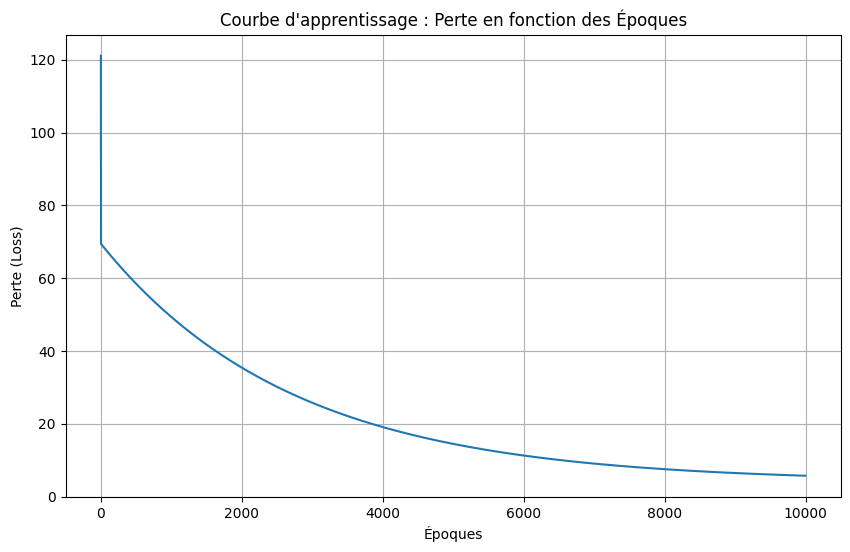

In [9]:
w_trained, b_trained, loss_history = train(X, Y, 0.001, 10000)
print(w_trained)
print(b_trained)
plt.figure(figsize=(10, 6))
plt.plot(loss_history[1:])
plt.title("Courbe d'apprentissage : Perte en fonction des Époques")
plt.xlabel("Époques")
plt.ylabel("Perte (Loss)")
plt.grid(True)
plt.show()

7. Donnez l'équation de la droite de régression obtenue. Ecrivez l'instruction permettant de calculer les valeurs prédites.

In [10]:
y_hat = w_trained * X + b_trained
print(y_hat)


[[63.808677   42.42129864 33.56137725 57.5682599  32.58497274 53.41012723
  59.08289222 51.34808991 53.23464945 30.55836888 59.99608333 36.47531355
  66.30469119 38.76034665 55.3961102  66.08922959 62.46245602 47.66312073
  39.51955213 43.78645634 60.42585316 31.53557375 27.32424382 37.28946072
  55.79879152 36.72321263 42.82726763 52.51028904 63.85027507 28.1162592
  49.63404438 49.50685954 42.14151857 58.36828043 63.24976005 48.1775477
  53.42191903 36.19231033 67.27722207 48.27063309 35.98149562 63.52259881
  38.48484746 65.79358547 68.07043908 47.52504055 28.73140909 43.35356412
  65.37819755 43.91555325 70.15836328 65.55818532 30.19830681 33.35929595
  70.20537935 60.3519501  48.96947189 60.98198359 65.6677815  61.45375488
  45.75492456 34.96259916 37.16251827 53.87219973 66.81845737 54.40729724
  35.89010735 69.87940641 48.17334566 57.31797248 43.66536001 36.93603467
  51.5314117  70.26218026 68.16771484 34.83754685 66.95238948 47.19497255
  35.11947346 57.42711804 35.96853717 41

8. Dessinez la droite de régression sur la même figure que le nuage de point.

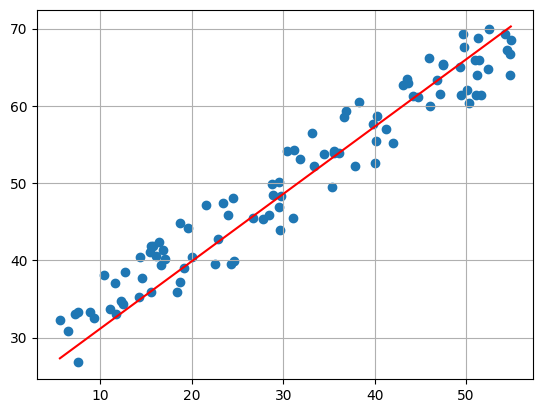

In [11]:
plt.grid()
plt.scatter(X, Y)
x_plot = np.linspace(X.min(), X.max(), 100)
y_plot = w_trained * x_plot + b_trained
plt.plot(x_plot, y_plot, color='red')
plt.show()

9. Comparez le résultat obtenu avec la droite donnée par <code>linregress</code> du sous module <code>stats</code> du module <code>scipy</code>.

0.8709596751054335 22.463793904716834
0.8709596751054336 22.463793904716823


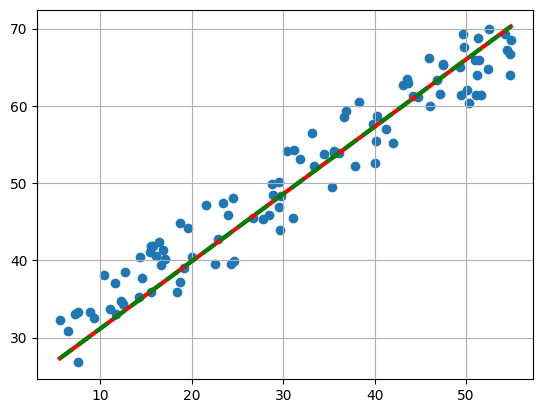

In [43]:
from scipy.stats import linregress
plt.grid()
plt.scatter(X, Y)
x_plot = np.linspace(X.min(), X.max(), 100)
y_plot = w_trained * x_plot + b_trained
w_scipy, b_scipy, r_value, p_value, stderr = linregress(x_plot, y_plot)
print(w_trained, b_trained)
print(w_scipy, b_scipy)
y_scipy = w_scipy * x_plot + b_scipy
plt.plot(x_plot, y_plot, color='red', linewidth=3)
plt.plot(x_plot, y_scipy, color='green', linestyle='--', linewidth=3)
plt.show()

### Exercice 3. Régression logistique :

Dans cet exercice, nous allons transformer le neurone afin de l'utiliser pour réaliser une classification. Nous allons nous limiter à une classification bianire : les élements appartiennent soit à une classe 0 soit à une classe 1.  

1. Comment devons-nous appeler la "fonction" <code>neuron</code> pour que le fonction d'activation soit la sigmoid ?

In [48]:
y_hat = neuron(X, w_trained, b_trained, sigmoid)

2. Exécutez la cellule suivante pour générer les données, les découper en deux parties train et test, etc. Observez le résultat de la cellule.

In [49]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=1, n_classes=2, 
                           n_informative=1, n_redundant=0, n_repeated=0,
                          n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y))

(750, 1)
(750,)
[0 1]


3. Définissez la nouvelle fonction de perte. Nous allons utiliser la fonction *cross_entropy* vue en cours :

$$
\cal L = -\frac 1 n \sum_{i=1} \left(y_i\times \log\left(\hat{y}_i\right) + (1-y_i)\log(1-\hat{y}_i)\right)
$$

4. Ecrivez les expressions mathématiques de ce que calcule votre neurone.

5. Calculez le gradient de $\cal L$ et écrivez la fonction correspondante.
   
Indication : la dérivée de la fonction sigmoid est : $\sigma'(z) = \sigma(z)\left(1 - \sigma(z)\right)$.

6. Adaptez une fonction <code>train(x, y, nu, epochs)</code> pour réaliser une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

7. Exécutez la cellule suivante pour que vos calculs matriciels puissent se faire et entraînez votre neurone.

In [50]:
X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[0]))
print(X_train.shape)
print(y_train.shape)

(1, 750)
(750,)


8. Evaluez votre modèle. Pour cela : 

8.1. Exécutez la cellule suivante pour formater les données de test.

In [51]:
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))

8.2. Appliquez votre neurone aux données de test et observez le résultat obtenu.

8.3. Transformez les sorties en 0 et 1 : 

8.4. Evaluez la qualité du modèle obtenu 